In [1]:
import pandas as pd
import numpy as np
import pymc as pm
from src.data_utils import load_and_process_data
from src.model import run_full_analysis
import matplotlib.pyplot as plt

league = 'Premier_League'
season = '2023-2024'


# Simple one-liner to get everything ready
df, team_mapping, n_teams = load_and_process_data(
    db_path=r'C:\Users\Owner\dev\algobetting\infra\data\db\fotmob.db',
    league=league, 
    season=season,
    max_goals=9,
    decay_rate=0.001,
    goals_weight=0.2,
    xg_weight=0.5,
    psxg_weight=0.3
)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


FOOTBALL MODEL ANALYSIS - PREMIER_LEAGUE 2023
Season: 2023
League: Premier_League
Teams: 20
Model version: vanilla_priors
Samples: 5000 (tune: 2500)

Building and sampling model...
No trace found for 2022
  ✗ No previous season trace found for 2022
  → Using default priors (no previous season data)


c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\pymc\data.py:274: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



Analyzing results...
MODEL ANALYSIS RESULTS

1. PARAMETER SUMMARY STATISTICS
----------------------------------------
                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
att_str_raw[0]  0.324  0.248  -0.191    0.753      0.019    0.013     178.0   
att_str_raw[1]  0.152  0.252  -0.338    0.609      0.019    0.013     185.0   
att_str_raw[2] -0.110  0.264  -0.590    0.409      0.019    0.013     201.0   
att_str_raw[3] -0.046  0.261  -0.546    0.417      0.018    0.013     202.0   
att_str_raw[4] -0.120  0.264  -0.616    0.363      0.018    0.013     206.0   
...               ...    ...     ...      ...        ...      ...       ...   
def_str[15]    -0.043  0.144  -0.334    0.210      0.002    0.002    6648.0   
def_str[16]     0.390  0.117   0.179    0.618      0.001    0.001    9078.0   
def_str[17]     0.098  0.133  -0.169    0.326      0.002    0.002    6655.0   
def_str[18]     0.221  0.122  -0.012    0.442      0.001    0.001    7780.0   
def_str[19] 

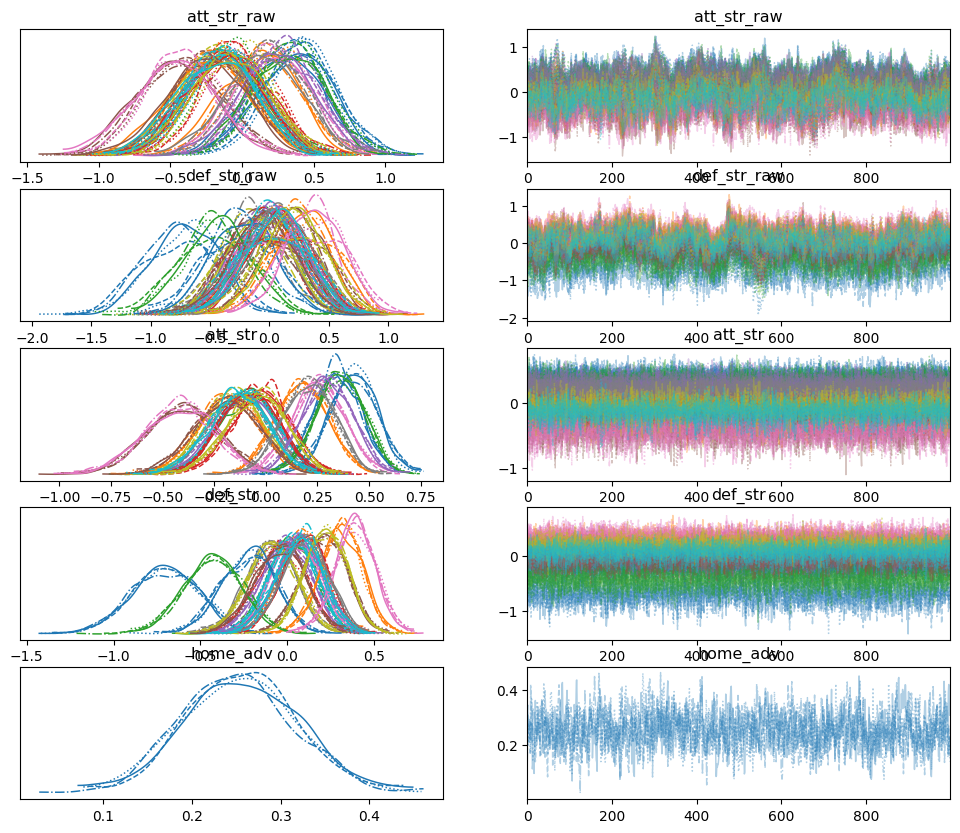

In [2]:
model, trace, results = run_full_analysis(
    train_df=df,
    teams=team_mapping,
    n_teams=n_teams,
    season=int(season[:4]),
    league=league,
    team_mapping=team_mapping,
    model_version="vanilla_priors",
    trace_samples=5000,
    tune_samples=2500
)